In [126]:
import pandas as pd
import numpy as np

In [127]:
datos = pd.read_csv('C:\master\dataset.csv')
clima = pd.read_csv('C:\master\datosclima.csv')

In [128]:
datos['date'] = pd.to_datetime(datos['date'])

In [129]:
clima['FECHA'] = pd.to_datetime(clima['FECHA'])

In [130]:
clima['FECHA'] = clima['FECHA'].dt.strftime('%Y-%m-%d')
clima['FECHA'] = pd.to_datetime(clima['FECHA'])

In [131]:
clima = clima.rename(columns={'FECHA': 'date'})

In [132]:
datos.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid
0,1,2010-10-08,Night,0,2.08,41.41
1,1,2011-02-16,Morning,0,2.08,41.41
2,1,2014-05-31,Night,0,2.08,41.41
3,1,2011-04-03,Afternoon,0,2.08,41.41
4,1,2013-02-20,Morning,0,2.08,41.41


In [133]:
clima.head()

,date,Precipitacion,Maxima,Minima,Media
0,2010-01-01,0.0,13.8,10.0,11.90
1,2010-02-01,0.0,11.9,8.6,10.25
2,2010-03-01,0.1,14.2,8.4,11.30
3,2010-04-01,15.0,12.2,9.3,10.75
4,2010-05-01,2.2,12.3,9.7,11.00


In [134]:
clima.isnull().sum()

date             0
Precipitacion    0
Maxima           0
Minima           0
Media            0
dtype: int64

In [135]:
datosAC = pd.merge(datos,
                 clima[['date', 'Precipitacion', 'Maxima', 'Minima', 'Media']],
                 on='date')

In [136]:
datosAC.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Precipitacion,Maxima,Minima,Media
0,1,2010-10-08,Night,0,2.080,41.4100,0.0,27.0,23.5,25.25
1,3,2010-10-08,Morning,0,2.085,41.4200,0.0,27.0,23.5,25.25
2,10,2010-10-08,Morning,0,2.095,41.4150,0.0,27.0,23.5,25.25
3,13,2010-10-08,Morning,0,2.095,41.4225,0.0,27.0,23.5,25.25
4,14,2010-10-08,Morning,0,2.095,41.4250,0.0,27.0,23.5,25.25


In [137]:
datosAC.isnull().sum()

GridID            0
date              0
Shift             0
Accident          0
Longitude.grid    0
Latitude.grid     0
Precipitacion     0
Maxima            0
Minima            0
Media             0
dtype: int64

In [138]:
aux = []
for prep in datosAC["Precipitacion"]:
    if ( prep >= 0 and prep <= 1 ):
        aux.append("ausente")
    if ( prep > 1 and prep <= 5 ): 
        aux.append("debil")
    if ( prep > 5 and prep <= 15 ): 
        aux.append("moderada")
    if ( prep > 15 ): 
        aux.append("fuerte")
    
datosAC["Lluvia"] = aux

In [139]:
LE.fit(datosAC["Lluvia"])
list(LE.classes_)
datosAC["Lluvia"] = LE.transform(datosAC["Lluvia"])
datosAC["Lluvia"].value_counts()

0    689304
1     46726
3     34007
2     21372
Name: Lluvia, dtype: int64

In [143]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(datosAC["Shift"])
list(LE.classes_)

[0, 1, 2]

In [144]:
datosAC["Shift"] = LE.transform(datosAC["Shift"])
datosAC["Shift"].value_counts()

0    268541
1    266313
2    256555
Name: Shift, dtype: int64

In [145]:
datosAC = datosAC.drop("Precipitacion",1)

In [146]:
from datetime import datetime, date, time, timedelta
import calendar

In [147]:
Week_Day = []
for fecha in datosAC['date']:
    dia_semana = datetime.weekday(fecha)+1
    Week_Day.append(dia_semana)
    
datosAC['Week.Day'] = Week_Day
del Week_Day

In [148]:
datosAC["Type.Day"] = datosAC["Week.Day"].apply(lambda x: 'workday' if x<6 else 'weekend')

In [149]:
LE.fit(datosAC["Type.Day"])
list(LE.classes_)

['weekend', 'workday']

In [150]:
datosAC["Type.Day"] = LE.transform(datosAC["Type.Day"])
datosAC["Type.Day"].value_counts()

1    569827
0    221582
Name: Type.Day, dtype: int64

In [151]:
festivos = ('1-1','6-1','19-4','22-4','1-05','10-6','24-6','15-8','11-9','24-9','12-10','1-11','6-12','8-12','25-12','26-12')

festive = []
for fecha in datosAC['date']:
    pasat = False
    for festivo in festivos:
        aux = festivo.split("-")
        aux2 = datetime.strftime(fecha, '%Y-%m-%d').split("-")
        if ( (aux2[1] == aux[1]) and (aux2[2] == aux[0]) and (pasat == False) ):
            festive.append(1)
            pasat = True
    if (pasat == False):
        festive.append(0)

datosAC['Festive'] = festive
del festive
del festivos

datosAC.loc[datosAC['Week.Day'] > 6, 'Festive'] = 1 

In [152]:
datosAC['Festive'].value_counts()

0    676454
1    114955
Name: Festive, dtype: int64

In [153]:
datosAC.head()

,GridID,date,Shift,Accident,Longitude.grid,Latitude.grid,Maxima,Minima,Media,Lluvia,Week.Day,Type.Day,Festive
0,1,2010-10-08,2,0,2.080,41.4100,27.0,23.5,25.25,0,5,1,0
1,3,2010-10-08,1,0,2.085,41.4200,27.0,23.5,25.25,0,5,1,0
2,10,2010-10-08,1,0,2.095,41.4150,27.0,23.5,25.25,0,5,1,0
3,13,2010-10-08,1,0,2.095,41.4225,27.0,23.5,25.25,0,5,1,0
4,14,2010-10-08,1,0,2.095,41.4250,27.0,23.5,25.25,0,5,1,0


In [154]:
import seaborn as sns

In [155]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

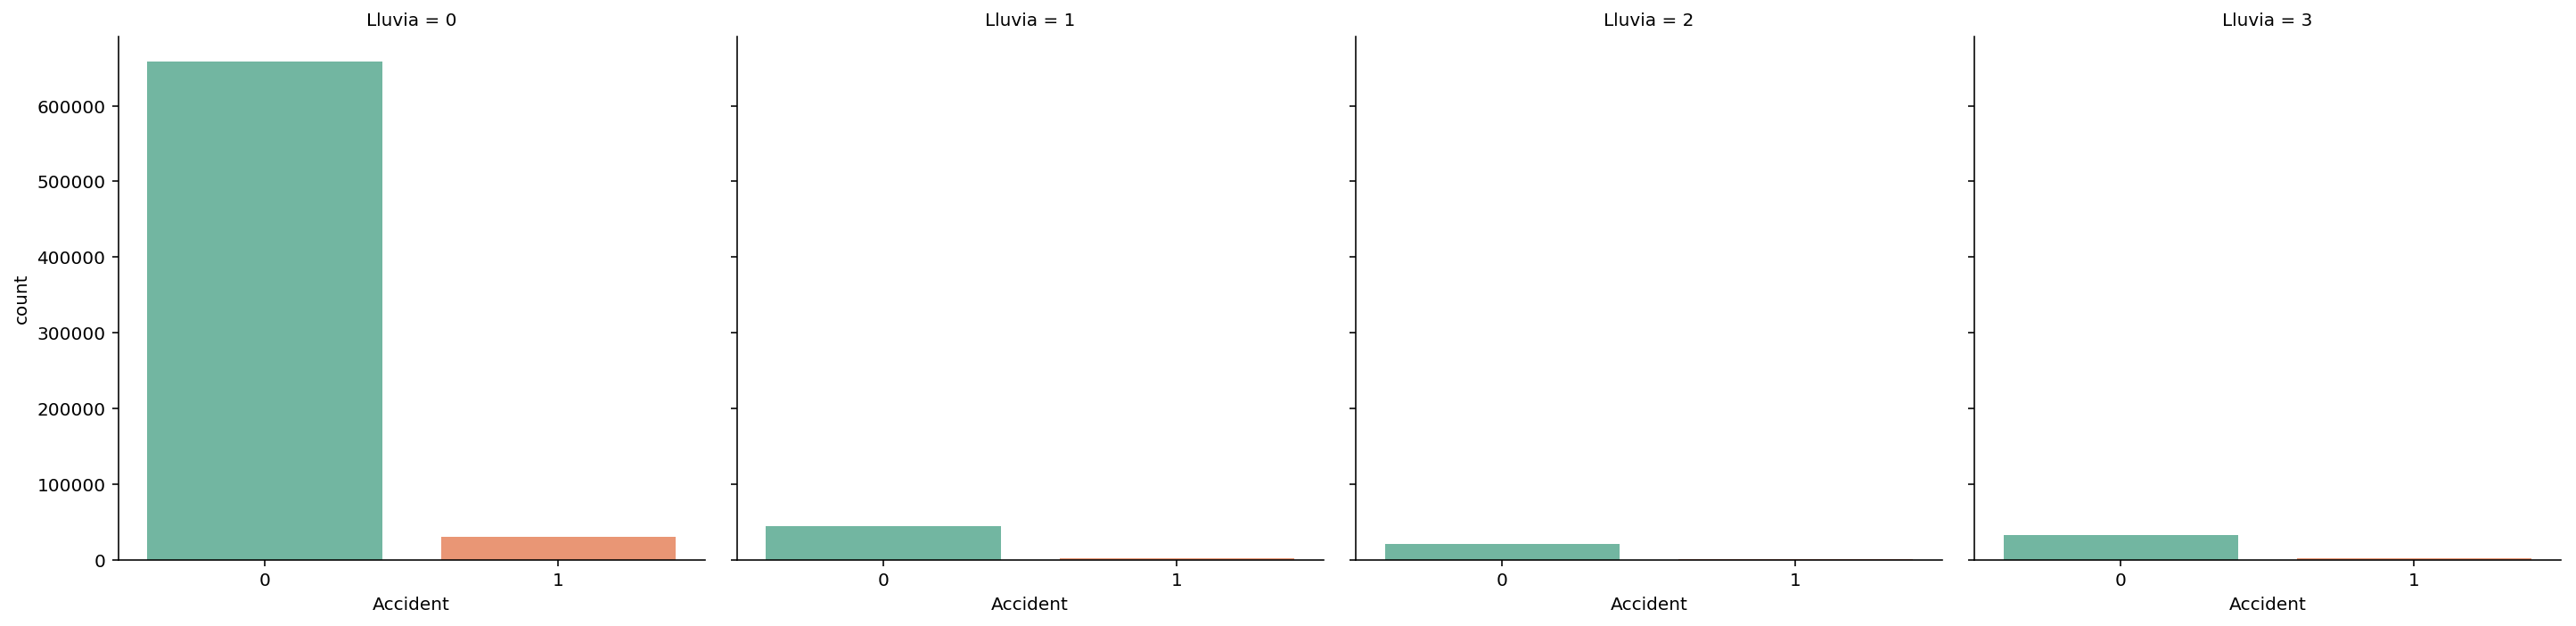

In [157]:
sns.catplot(x="Accident", col="Lluvia",data=datosAC, palette="Set2", kind="count")

# Árbol decisiones

In [167]:
X = datosAC.drop("Accident",1)
X = X.drop("date",1)
y = datosAC["Accident"]

In [168]:
print(X.shape)
print(y.shape)

(791409, 11)
(791409,)


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(553986, 11)
(237423, 11)
(553986,)
(237423,)


In [170]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', random_state=1)


In [171]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [172]:
y_train_pred = DTC.predict_proba(X_train)
from sklearn.metrics import roc_auc_score

In [173]:
print(roc_auc_score(y_train, y_train_pred[:, 1]), "Árbol de decisión - Datos de entrenamiento")

0.9999999473697296 Árbol de decisión - Datos de entrenamiento


In [174]:
y_test_pred = DTC.predict_proba(X_test)

In [175]:
print(roc_auc_score(y_test, y_test_pred[:, 1]), "Árbol de decisión - Datos de test")

0.5448394539129807 Árbol de decisión - Datos de test


# Como se ha visto en la gráfica, tenemos overfit con los datos de Lluvia, la gran mayoria de accidentes se producen sin lluvia, es mas la mayoria de registros vienen condicionados a falta de lluvia.

Hemos querido trabajar con un dataset de clima extraido de datosclima.es, se ha comentado en clase y hay compañeros que han optado por añadirlo y otros no, no se ha comentado en el foro de la asignatura.

Los datos de clima no son 100% fiables, la extracción ha dejado registros sin datos de precipitaciones y temperaturas, se ha optado por hacer medias de temperaturas y comparar registros de lluvias de otros años para rellenar los datos ausentes.